<a href="https://colab.research.google.com/github/Akshata1992/Machine_Learning/blob/master/TopicModeling_SemanticAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import all neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_20newsgroups

In [3]:
dataset = fetch_20newsgroups(shuffle=True,random_state=42,remove=('headers','footers','quotes'))
documents = dataset.data
len(documents)

11314

In [4]:
dataset.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
#data preprocessing
new_df = pd.DataFrame({'document':documents})

#remove all special characters except hashtag and characters
new_df['clean_doc'] = new_df['document'].str.replace('[^a-zA-Z^]',' ')
new_df.head()

,document,clean_doc
0,I was wondering if anyone out there could enli...,I was wondering if anyone out there could enli...
1,A fair number of brave souls who upgraded thei...,A fair number of brave souls who upgraded thei...
2,"well folks, my mac plus finally gave up the gh...",well folks my mac plus finally gave up the gh...
3,\nDo you have Weitek's address/phone number? ...,Do you have Weitek s address phone number I...
4,"From article <C5owCB.n3p@world.std.com>, by to...",From article C owCB n p world std com by to...


In [6]:
#removing short words
new_df['clean_doc'] = new_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
new_df.head()

,document,clean_doc
0,I was wondering if anyone out there could enli...,wondering anyone there could enlighten this ot...
1,A fair number of brave souls who upgraded thei...,fair number brave souls upgraded their clock o...
2,"well folks, my mac plus finally gave up the gh...",well folks plus finally gave ghost this weeken...
3,\nDo you have Weitek's address/phone number? ...,have Weitek address phone number like some inf...
4,"From article <C5owCB.n3p@world.std.com>, by to...",From article owCB world tombaker world Baker u...


In [7]:
#make all text lowercase
new_df['clean_doc'] = new_df['clean_doc'].apply(lambda x:x.lower())
new_df.head()

,document,clean_doc
0,I was wondering if anyone out there could enli...,wondering anyone there could enlighten this ot...
1,A fair number of brave souls who upgraded thei...,fair number brave souls upgraded their clock o...
2,"well folks, my mac plus finally gave up the gh...",well folks plus finally gave ghost this weeken...
3,\nDo you have Weitek's address/phone number? ...,have weitek address phone number like some inf...
4,"From article <C5owCB.n3p@world.std.com>, by to...",from article owcb world tombaker world baker u...


In [8]:
#import stop words from nltk library
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
#tokenization
tokenized_words = new_df['clean_doc'].apply(lambda x:x.split())
tokenized_words.head()

0    [wondering, anyone, there, could, enlighten, t...
1    [fair, number, brave, souls, upgraded, their, ...
2    [well, folks, plus, finally, gave, ghost, this...
3    [have, weitek, address, phone, number, like, s...
4    [from, article, owcb, world, tombaker, world, ...
Name: clean_doc, dtype: object

In [10]:
#remove the stop words
tokenized_words = tokenized_words.apply(lambda x:[i for i in x if i not in stop_words])
tokenized_words.head()

0    [wondering, anyone, could, enlighten, door, sp...
1    [fair, number, brave, souls, upgraded, clock, ...
2    [well, folks, plus, finally, gave, ghost, week...
3    [weitek, address, phone, number, like, informa...
4    [article, owcb, world, tombaker, world, baker,...
Name: clean_doc, dtype: object

In [11]:
#detokenization
de_tokenized_doc = []
for i in range(len(tokenized_words)):
  t = ' '.join(tokenized_words[i])
  de_tokenized_doc.append(t)

new_df['clean_doc'] = de_tokenized_doc
new_df.head()

,document,clean_doc
0,I was wondering if anyone out there could enli...,wondering anyone could enlighten door sports l...
1,A fair number of brave souls who upgraded thei...,fair number brave souls upgraded clock oscilla...
2,"well folks, my mac plus finally gave up the gh...",well folks plus finally gave ghost weekend sta...
3,\nDo you have Weitek's address/phone number? ...,weitek address phone number like information chip
4,"From article <C5owCB.n3p@world.std.com>, by to...",article owcb world tombaker world baker unders...


In [12]:
#convert the words inot vector
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words = 'english',max_features=5000,max_df=0.5,smooth_idf=True)
X = vectorizer.fit_transform(new_df['clean_doc'])
X.shape

(11314, 5000)

In [13]:
#lets define SVD to on every document of the dataset
from sklearn.decomposition import TruncatedSVD

#SVD represents documents and terms in vectors
svd_model = TruncatedSVD(n_components=20,algorithm='randomized',n_iter=100,random_state=122)
svd_model.fit(X)

len(svd_model.components_)

20

In [14]:
terms = vectorizer.get_feature_names()

for i,comp in enumerate(svd_model.components_):
  terms_comp = zip(terms,comp)
  sorted_terms = sorted(terms_comp,key=lambda x:x[1], reverse=True)[:7]
  print("Topic "+str(i)+": ")
  for t in sorted_terms:
    print(t[0])
    print(" ")

Topic0: 
like
 
know
 
people
 
think
 
good
 
time
 
thanks
 
Topic1: 
thanks
 
windows
 
card
 
drive
 
mail
 
file
 
advance
 
Topic2: 
drive
 
scsi
 
drives
 
hard
 
disk
 
controller
 
card
 
Topic3: 
pitt
 
cadre
 
gordon
 
chastity
 
shameful
 
intellect
 
skepticism
 
Topic4: 
drive
 
cadre
 
chastity
 
shameful
 
skepticism
 
gordon
 
intellect
 
Topic5: 
thanks
 
mail
 
know
 
drive
 
advance
 
email
 
address
 
Topic6: 
chip
 
encryption
 
clipper
 
government
 
keys
 
phone
 
data
 
Topic7: 
card
 
video
 
monitor
 
drivers
 
cards
 
driver
 
sale
 
Topic8: 
know
 
like
 
chip
 
thanks
 
think
 
bike
 
clipper
 
Topic9: 
like
 
bike
 
good
 
sale
 
window
 
offer
 
space
 
Topic10: 
israel
 
armenian
 
armenians
 
israeli
 
turkish
 
people
 
like
 
Topic11: 
window
 
problem
 
space
 
display
 
time
 
server
 
card
 
Topic12: 
space
 
know
 
nasa
 
card
 
file
 
files
 
shuttle
 
Topic13: 
like
 
know
 
israel
 
game
 
file
 
jews
 
jesus
 
Topic14: 
know
 
good
 
bike
 
f

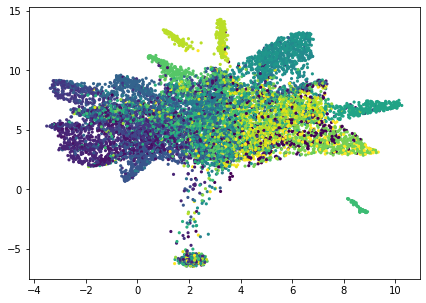

In [16]:
#topic visualization
import umap

x_topics = svd_model.fit_transform(X)
embedding = umap.UMAP(n_neighbors=150, min_dist=0.5, random_state=12).fit_transform(x_topics)

plt.figure(figsize=(7,5))
plt.scatter(embedding[:, 0], embedding[:, 1], 
c = dataset.target,
s = 10, # size
edgecolor='none'
)
plt.show()